In [6]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [7]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
trans = {0:"airplane", 1:"automobile", 2:"bird",
         3:"cat", 4:"deer", 5:"dog", 6:"frog",
         7:"horse", 8:"ship", 9:"truck"}

是什麼? ship


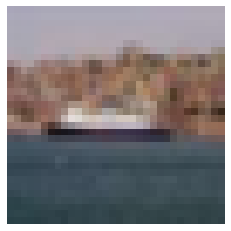

In [9]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, x_train.shape[0]-1)
print("是什麼?", trans[y_train[c][0]])
plt.axis("off")
plt.imshow(x_train[c])

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
cnn = Sequential()
# 一個過濾器(3 * 3 * 3) * 64(個) + 64(bias)
cnn.add(Conv2D(64, (3, 3), 
               padding="same", 
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
# 一個過濾器(3 * 3 * 64) * 128(個) + 128
cnn.add(Conv2D(128, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(512, activation="relu"))
cnn.add(Dropout(0.25)) #dropout 0.25 放在每層denase之間
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

In [14]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [15]:
# 唯一不用做的事就是reshape
from keras.utils.np_utils import to_categorical
x_train_norm = x_train / 255
x_test_norm = x_test / 255
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# batch_size 通常100~200 epochs通常10次

In [16]:
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, epochs=10,
        validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 135s - loss: 1.5899 - acc: 0.4230 - val_loss: 1.2341 - val_acc: 0.5642
Epoch 2/10
 - 133s - loss: 1.1284 - acc: 0.6034 - val_loss: 0.9411 - val_acc: 0.6718
Epoch 3/10
 - 135s - loss: 0.9161 - acc: 0.6804 - val_loss: 0.8292 - val_acc: 0.7174
Epoch 4/10
 - 136s - loss: 0.7874 - acc: 0.7243 - val_loss: 0.7618 - val_acc: 0.7384
Epoch 5/10
 - 133s - loss: 0.6743 - acc: 0.7654 - val_loss: 0.7281 - val_acc: 0.7518
Epoch 6/10
 - 138s - loss: 0.5923 - acc: 0.7935 - val_loss: 0.6897 - val_acc: 0.7656
Epoch 7/10
 - 135s - loss: 0.5157 - acc: 0.8205 - val_loss: 0.6837 - val_acc: 0.7678
Epoch 8/10
 - 133s - loss: 0.4324 - acc: 0.8487 - val_loss: 0.6796 - val_acc: 0.7752
Epoch 9/10
 - 132s - loss: 0.3622 - acc: 0.8743 - val_loss: 0.6953 - val_acc: 0.7734
Epoch 10/10
 - 138s - loss: 0.2993 - acc: 0.8943 - val_loss: 0.7143 - val_acc: 0.7842


In [17]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 9s 944us/step


[0.7838780010223388, 0.759]

In [18]:
pre = cnn.predict_classes(x_test_norm)
pre.shape

(10000,)

In [19]:
y_test.shape

(10000, 1)

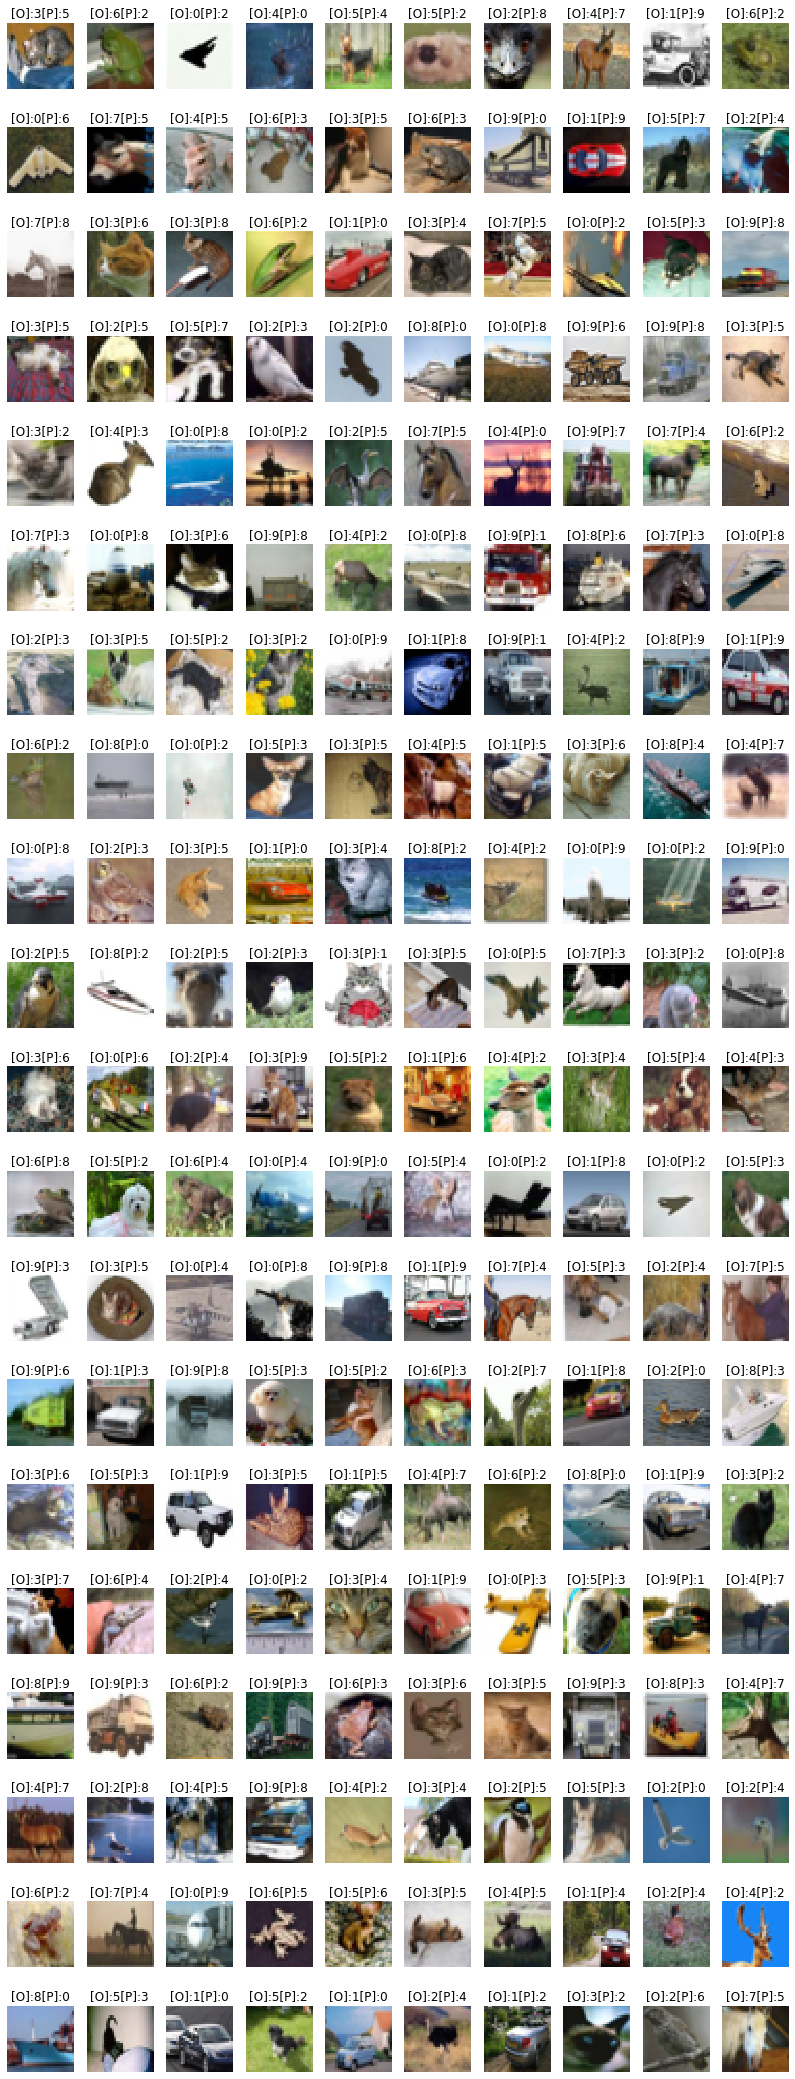

In [20]:
import numpy as np
pre = cnn.predict_classes(x_test_norm)
# 找出不一樣的預測的index
idx = np.nonzero(y_test.reshape(10000) != pre)[0][:200]
# 把所有不一樣的圖片拿出來
false_img = x_test[idx]
false_ori_label = y_test[idx]
false_pre_label = pre[idx]
plt.figure(figsize=(14, 40))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    msg = "[O]:" + str(false_ori_label[i][0]) + "[P]:" + str(false_pre_label[i])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img)
#trans = {0:"airplane", 1:"automobile", 2:"bird",
#         3:"cat", 4:"deer", 5:"dog", 6:"frog",
#         7:"horse", 8:"ship", 9:"truck"}